# Joint analyse of RNA+ADT multimodal dataset using VIMCCA
This tutorial shows loading, preprocessing, VIMCCA joint analyse of multimodal dataset.

### import packages
Here, we’ll import scbean along with other popular packages.

In [1]:
import matplotlib
matplotlib.use('TkAgg')
import scanpy as sc
from scbean.model import vimcca

# Command for Jupyter Notebooks only
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

## loading dataset
This use the CITE-seq dataset from [(Stuart*, Butler* et al, Cell 2019)](https://www.cell.com/cell/fulltext/S0092-8674(19)30559-8), which consists of 30,672 scRNA-seq profiles measured alongside a panel of 25 antibodies from bone marrow. The object contains two assays, RNA and antibody-derived tags (ADT).

In [2]:
base_path = '/Users/wangyuwei/data/'
file_rna = base_path + 'bmcite_rna.h5ad'
file_atac = base_path + 'bmcite_adt.h5ad'

adata_rna = sc.read_h5ad(file_rna)
adata_adt = sc.read_h5ad(file_atac)

## Processing with scanpy
Here, we filter genes that expressed in less than ten cells. We then apply CPM normalization for each cell so that every cell have same total count after normalization. Finally, we performed a log transformation. As for ADT count data, we p erformed the same op erations excepting for ltering genes since there are only 25 proteins

In [3]:
# filter genes
sc.pp.filter_genes(adata_rna, min_cells=10)
# CMP
sc.pp.normalize_total(adata_rna, target_sum=1e6)
sc.pp.normalize_total(adata_adt, target_sum=1e6)
# log transformation
sc.pp.log1p(adata_rna)
sc.pp.log1p(adata_adt)
# scale genes to unit variance
sc.pp.scale(adata_rna)
sc.pp.scale(adata_adt)

## Joint analyse using VIMCCA
The returned z represents the complementary low-dimensional features of the two modalities learned by VIMCCA, which can be used for downstream analysis.

In [4]:
z = vimcca.fit_integration(
    adata_rna,
    adata_adt,
    sparse_x=False,
    sparse_y=False,
    hidden_layers=[128, 64, 16, 8],
    epochs=50,
    weight=5
)

Model: "VIMCCA_mlp"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_x (InputLayer)           [(None, 16313)]      0                                            
__________________________________________________________________________________________________
encoder_z (Functional)          [(None, 8), (None, 8 2098384     inputs_x[0][0]                   
                                                                 inputs_x[0][0]                   
__________________________________________________________________________________________________
inputs_y (InputLayer)           [(None, 25)]         0                                            
__________________________________________________________________________________________________
decoder_x (Functional)          (None, 16313)        2114553     encoder_z[0][2]         

240/240 [==============================] - 22s 76ms/step - loss: 8360.1504
Epoch 2/50
240/240 [==============================] - 18s 76ms/step - loss: 8018.1430
Epoch 3/50
240/240 [==============================] - 18s 77ms/step - loss: 7970.6398
Epoch 4/50
240/240 [==============================] - 18s 76ms/step - loss: 8000.3285
Epoch 5/50
240/240 [==============================] - 19s 79ms/step - loss: 7954.0166
Epoch 6/50
240/240 [==============================] - 19s 77ms/step - loss: 7884.0260
Epoch 7/50
240/240 [==============================] - 19s 79ms/step - loss: 7931.1389
Epoch 8/50
240/240 [==============================] - 18s 77ms/step - loss: 7974.4825
Epoch 9/50
240/240 [==============================] - 18s 76ms/step - loss: 7912.1709
Epoch 10/50
240/240 [==============================] - 18s 77ms/step - loss: 7896.6996
Epoch 11/50
240/240 [==============================] - 18s 77ms/step - loss: 7900.2621
Epoch 12/50
240/240 [==============================] - 18s 77ms

## Visualization

In [5]:
adata_rna.obsm['X_vimcca'] = z
sc.pp.neighbors(adata_rna, use_rep='X_vimcca')
sc.tl.leiden(adata_rna, resolution=3)
sc.tl.umap(adata_rna)

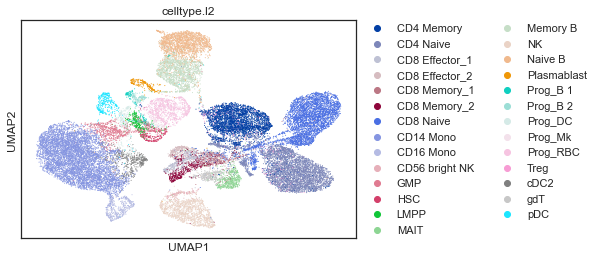

In [6]:
sc.pl.umap(adata_rna, color='celltype.l2')

We can explore marker genes

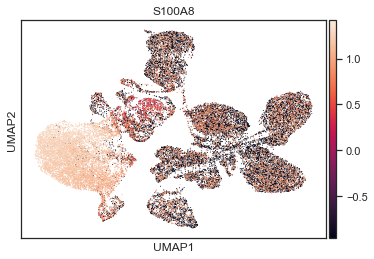

In [7]:
sc.pl.umap(adata_rna, color=['S100A8'])